In [1]:
from src.IO import load_NIST_data, load_transition_data
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from src import *
import src.lineshapes as lineshapes
from src.atom import Atom
import src.graphers as graphers
from pprint import pprint

In [2]:
def draw_levels(atom, plot_type='norm', **kwargs):
    posdict = {l.name: (l.term.J, l.level_Hz) for l in atom.levels.values()}
    if plot_type == 'norm':
        nx.draw(atom.levelsModel, pos=posdict, node_shape="_", with_labels=True, font_size=8, **kwargs)
    elif plot_type == 'hf':
        nx.draw(a.hfModel, pos=posdict, node_shape="_", with_labels=True, font_size=8, **kwargs)
    elif plot_type == 'z':
        nx.draw(a.zModel, pos=posdict, node_shape="_", with_labels=True, font_size=8, **kwargs)
    plt.show()


def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load_from_pickle=False):
    if load_from_pickle:
        a = Atom.from_pickle(f'atoms/{species}.atom')
    else:
        df = load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        a = Atom.generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                              num_levels=num_levels,
                                              B=B,
                                              hf_csv=f'resources/{species}_Hyperfine.csv',
                                              transitions_df=trans_df,
                                              allowed=0b101)
        if save:
            a.to_pickle(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'resources/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [3]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': "./resources/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': "./resources/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [4]:
# whether to load from pickle
load_from_pickle = False
# whether to save the ion
save = False
# Name of the atom
species = '173Yb'
# Number of levels to generate
num_levels = 20
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load_from_pickle=load_from_pickle, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.95it/s]
adding level 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                                     
adding transition 4f14.5d 2D3/2 → 4f14.6p 2P*1/2                                                                       
adding internal transitions to 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                   

Generation complete


In [5]:
pprint(a.list_levels())

['4f14.6s 2S1/2',
 '4f13.(2F*).6s2 2F*7/2',
 '4f13.(2F*).6s2 2F*5/2',
 '4f14.5d 2D3/2',
 '4f14.5d 2D5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2',
 '4f14.6p 2P*1/2',
 '4f14.6p 2P*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2']


In [6]:
pprint(a.list_transitions())

[('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2'),
 ('4f14.6s 2S1/2', '4f14.6p 2P*3/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2'),
 ('4f14.6s 2S1/2', '4f14.6p 2P*1/2'),
 ('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2'),
 ('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2'),
 ('4f14.5d 2D3/2', '4f14.6p 2P*3/2'),
 ('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2'),
 ('4f14.5d 2D3/2', '4f14.6p 2P*1/2'),
 ('4f14.5d 2D5/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2'),
 ('4f14.5d 2D5/2', '4f14.6p 2P*3/2'),
 ('4f14.5d 2D5/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2')]


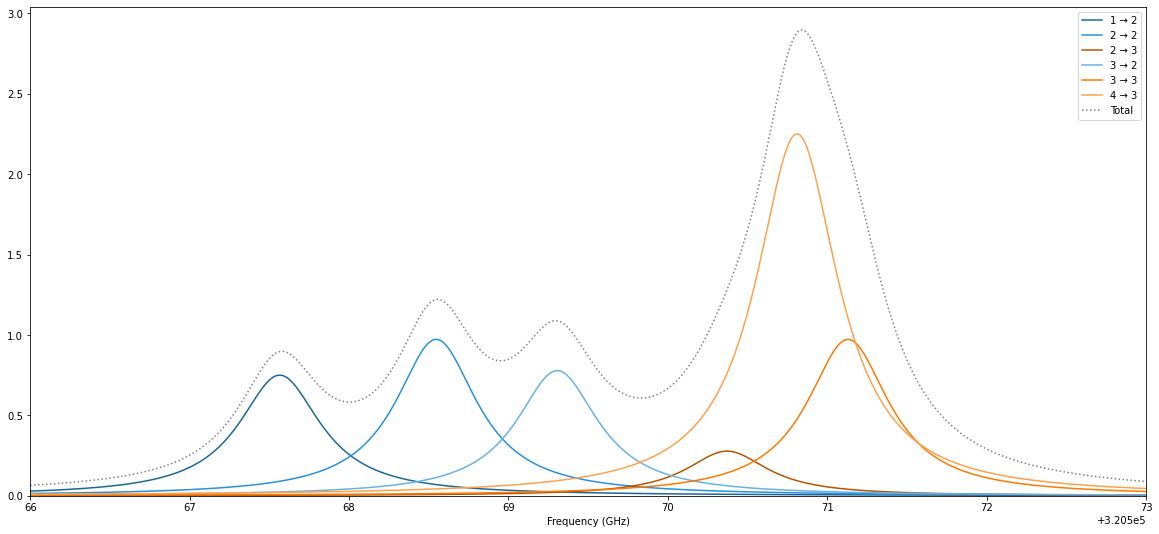

In [18]:
%matplotlib inline

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1*6.28, ampl=1.0)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.5, ampl=1.0, depth=0, mod_freq_GHz=0.8)

graphers.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                       lineshape=lineshape, coloring='u', num_points=3000)
plt.xlim(3.205e5+66, 3.205e5+73)

# from src.lineshapes import lorentzian
# import numpy as np
# x_vals = np.linspace(3.205e5+65, 3.205e5+75, 4000)
# y_vals = lorentzian(x_vals, 320570-.535, gamma=1.5, ampl=1.) + lorentzian(x_vals, 320570+1.275, gamma=0.5, ampl=2.5)
# plt.plot(x_vals, y_vals, 'g')

plt.show()

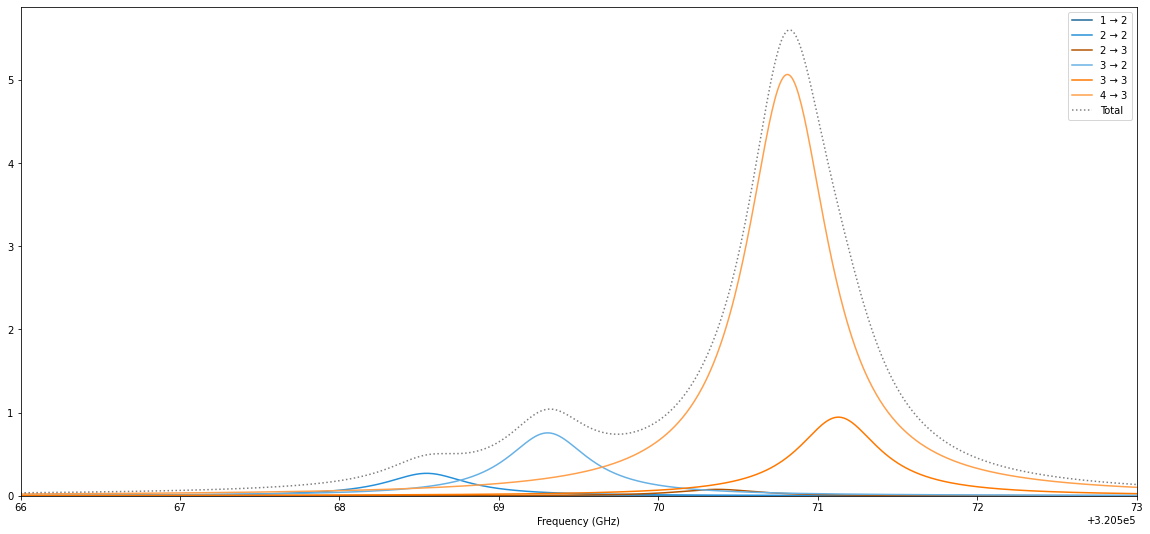

In [26]:
%matplotlib inline

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1*6.28, ampl=1.0)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.5, ampl=1.0, depth=0, mod_freq_GHz=0.8)

ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.2777777777777778, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.2777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222222,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222222,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 2.2500000000000004,}

graphers.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                       lineshape=lineshape, coloring='u', num_points=3000, ampl_dict = ampl_dict)
plt.xlim(3.205e5+66, 3.205e5+73)

plt.show()

In [14]:
pprint([(s.name, str(s.freq.to('THz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].subtransitions.values()])

[('4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '320.569692986648 terahertz',
  0.7499999999999999),
 ('4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '320.570674726648 terahertz',
  0.9722222222222224),
 ('4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '320.568850726648 terahertz',
  0.2777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '320.571433786648 terahertz',
  0.7777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '320.569609786648 terahertz',
  0.9722222222222222),
 ('4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '320.569289906648 terahertz',
  2.2500000000000004)]


In [8]:
pprint([(s.name, str(s.freq.to('THz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f14.6p 2P*1/2')].subtransitions.values()])

[('4f14.5d 2D3/2 F=1 → 4f14.6p 2P*1/2 F=2',
  '122.94525860321588 terahertz',
  0.7499999999999999),
 ('4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=2',
  '122.94624034321588 terahertz',
  0.9722222222222224),
 ('4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=3',
  '122.94449674321588 terahertz',
  0.2777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=2',
  '122.94699940321587 terahertz',
  0.7777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=3',
  '122.94525580321587 terahertz',
  0.9722222222222222),
 ('4f14.5d 2D3/2 F=4 → 4f14.6p 2P*1/2 F=3',
  '122.94493592321587 terahertz',
  2.2500000000000004)]


In [18]:
p_state_ampls = {s.name: s.rel_strength for s in a.transitions[('4f14.5d 2D3/2', '4f14.6p 2P*1/2')].subtransitions.values()}
p_state_ampls

{'4f14.5d 2D3/2 F=1 → 4f14.6p 2P*1/2 F=2': 0.7499999999999999,
 '4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=2': 0.9722222222222224,
 '4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=3': 0.2777777777777778,
 '4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=2': 0.7777777777777778,
 '4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=3': 0.9722222222222222,
 '4f14.5d 2D3/2 F=4 → 4f14.6p 2P*1/2 F=3': 2.2500000000000004}

In [19]:
ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.2777777777777778, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.2777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222222,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222222,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 2.2500000000000004,}